#       Deep learning with Text Mininig    
##                    Rennes School of Business
##                      Project 
####      
                               2022



For this task, you need to use tweet data for forcasting stock price.
The file Amazon.csv contains informaion on Tweets about Amazon stock from 2015 until 2020. For this task is to forecast stock price or return of Amazon with and woutout tweet data by applying deep learning model. You should find optimum configuration of deep learning with grid search. 


##Students name 	  Student No.	      

##Group: 

##To hand in
###Guidelines for report layout





In [1]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Import file from Google Drive
import pandas as pd
file_path = "/content/drive/MyDrive/Dr Amir Courses projects/Deep learning/2 Sentiment analysis using text mining/Stock price prediction with tweet data/Try 2/Amazon.csv"
df = pd.read_csv(file_path)


Mounted at /content/drive


# Section 1 Stentiment analysis of tweets

In [2]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [3]:
sentence = "i really like you but you can be so dumb some times"

In [4]:
import pandas as pd

# Read in the Amazon.csv file
#df = pd.read_csv('Amazon.csv')

# Calculate the index of the last row to keep (i.e. the first row to delete)
last_row_index = int(len(df) * 0.2)

# Delete the last 80% of rows
df = df.iloc[:last_row_index]

# Save the modified DataFrame to a new CSV file
df.to_csv('Amazon3.csv', index=False)

# Print the first few rows of the modified DataFrame to verify the changes
print(df.head())

   Unnamed: 0      tweet_id ticker_symbol          writer   post_date  \
0           3  5.504417e+17          AMZN     DozenStocks  1420070510   
1          27  5.504479e+17          AMZN  JorelLaraKalel  1420071969   
2          38  5.504532e+17          AMZN     jakubhajost  1420073237   
3          39  5.504536e+17          AMZN             WSJ  1420073345   
4          40  5.504539e+17          AMZN     GillesKLEIN  1420073410   

                                                body  comment_num  \
0  S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
1  Top 10 searched #stocks of #2014 $AAPL $FB $BA...            0   
2  RT @SeekingAlpha: A Look At BlackBerry's Deals...            0   
3  Jeff Bezos lost $7.4 billion in Amazon's worst...           21   
4  Jeff Bezos lost $7.4 billion in #Amazon worst ...            1   

   retweet_num  like_num  
0            0         0  
1            0         2  
2            0         0  
3          139        57  
4          

In [5]:
import pandas
#df = pandas.read_csv('Amazon.csv')
df.head(5)

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,3,5.504417e+17,AMZN,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
1,27,5.504479e+17,AMZN,JorelLaraKalel,1420071969,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,0,0,2
2,38,5.504532e+17,AMZN,jakubhajost,1420073237,RT @SeekingAlpha: A Look At BlackBerry's Deals...,0,0,0
3,39,5.504536e+17,AMZN,WSJ,1420073345,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57
4,40,5.504539e+17,AMZN,GillesKLEIN,1420073410,Jeff Bezos lost $7.4 billion in #Amazon worst ...,1,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143773 entries, 0 to 143772
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     143773 non-null  int64  
 1   tweet_id       143773 non-null  float64
 2   ticker_symbol  143773 non-null  object 
 3   writer         142720 non-null  object 
 4   post_date      143773 non-null  int64  
 5   body           143773 non-null  object 
 6   comment_num    143773 non-null  int64  
 7   retweet_num    143773 non-null  int64  
 8   like_num       143773 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 9.9+ MB


In [7]:
pip install pysentiment2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.6 MB/s eta 0:00:00


In [8]:
import pysentiment2 as ps
# Do something with pysentiment2

In [9]:
def myhiv4sentiment (Data):
    hiv4sentiment = []
    hiv4 = ps.HIV4()
    for a in Data:
        tokens = hiv4.tokenize(a)
        scorehiv4 = hiv4.get_score(tokens)
        hiv4sentiment.append(scorehiv4)

    return hiv4sentiment 


In [10]:
def myscorelmsentiment (Data):
    lmsentiment = []
    lm = ps.LM()
    for a in Data:  
        tokens = lm.tokenize(a)
        scorelm = lm.get_score(tokens)
        lmsentiment.append(scorelm)

    return lmsentiment 

In [11]:
hiv4sentiment_score= pd.DataFrame.from_records(myhiv4sentiment(df['body']))
hiv4sentiment_score.columns = ['hiv4Positive'	,'hiv4Negative'	,'hiv4Polarity',	'hiv4Subjectivity']
df = df.join(hiv4sentiment_score)

In [12]:
lmsentiment_score= pd.DataFrame.from_records(myscorelmsentiment(df['body']))
lmsentiment_score.columns = ['LMPositive'	,'LMNegative'	,'LMPolarity',	'LMSubjectivity']
df = df.join(lmsentiment_score, rsuffix='_suffix')

In [13]:
df.head(5)

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity
0,3,5.504417e+17,AMZN,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,27,5.504479e+17,AMZN,JorelLaraKalel,1420071969,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,0,0,2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,38,5.504532e+17,AMZN,jakubhajost,1420073237,RT @SeekingAlpha: A Look At BlackBerry's Deals...,0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,39,5.504536e+17,AMZN,WSJ,1420073345,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57,0.0,2.0,-1.0,0.181818,0.0,2.0,-1.0,0.181818
4,40,5.504539e+17,AMZN,GillesKLEIN,1420073410,Jeff Bezos lost $7.4 billion in #Amazon worst ...,1,2,1,0.0,2.0,-1.0,0.181818,0.0,2.0,-1.0,0.181818


In [14]:
import datetime
df['Date'] = pd.to_datetime(df['post_date'],unit='s').dt.strftime('%Y-%m-%d')

In [15]:
df = df.sort_values(by="Date")

In [16]:
df.tail(10)

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity,Date
143622,1024746,7.108033e+17,AMZN,retail_Dbt,1458303689,Office Depot stock leaps on rumor that #Amazon...,0,0,0,1.0,1.0,0.000000,0.066667,0.0,0.0,0.000000,0.000000,2016-03-18
143623,1024751,7.108038e+17,AMZN,Hotpage_News,1458303812,Early movers: $TIF $ADBE $JPM $SFLY $CPGX $AM...,0,0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2016-03-18
143624,1024752,7.108038e+17,AMZN,HotpageNews,1458303812,Early movers: $TIF $ADBE $JPM $SFLY $CPGX $AM...,0,0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2016-03-18
143625,1024765,7.108055e+17,AMZN,tomstocks112,1458304217,Google $GOOG just scored a huge win against Am...,0,0,0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.999999,0.066667,2016-03-18
143626,1024767,7.108057e+17,AMZN,IBD_DChung,1458304248,Amazon Holds The Fort: 200-day line is respect...,0,1,1,1.0,2.0,-0.333333,0.200000,1.0,0.0,0.999999,0.066667,2016-03-18
143627,1024772,7.108062e+17,AMZN,LloydCreekStock,1458304367,"$AMZN Staples, Office Depot Say Their Merger G...",0,0,0,0.0,1.0,-0.999999,0.076923,0.0,1.0,-0.999999,0.076923,2016-03-18
143628,1024773,7.108062e+17,AMZN,LloydCreekStock,1458304367,$AMZN http://Amazon.com's Big Week,0,0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2016-03-18
143629,1024777,7.108068e+17,AMZN,Albert_Report,1458304513,Early movers: $TIF $ADBE $JPM $SFLY $CPGX $AM...,0,0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2016-03-18
143659,1024940,7.108201e+17,AMZN,EQMIndexes,1458307683,Shutterfly Hired An Amazon Exec As Its New CEO...,0,0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2016-03-18
143772,1025685,7.108697e+17,AMZN,bux,1458319516,Looks like @Amazon got kicked to the curb & lo...,0,0,0,1.0,3.0,-0.500000,0.285714,0.0,2.0,-1.000000,0.142857,2016-03-18


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = df.groupby(['Date']).mean()

In [18]:
mean_c = mean_c.sort_values(by="Date")

In [19]:
mean_c.tail(5)

,Unnamed: 0,tweet_id,post_date,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity
Date,,,,,,,,,,,,,,
2016-03-14,1.013141e+06,7.094136e+17,1.457972e+09,0.066282,0.368876,0.414986,0.487032,0.311239,0.072732,0.064603,0.097983,0.095101,0.005764,0.017126
2016-03-15,1.016122e+06,7.097617e+17,1.458055e+09,0.031315,0.185804,0.331942,0.826722,0.565762,0.197634,0.105510,0.104384,0.189979,-0.048713,0.024089
2016-03-16,1.019268e+06,7.101273e+17,1.458143e+09,0.074074,0.253561,0.381766,0.786325,0.626781,0.108859,0.102909,0.122507,0.250712,-0.042735,0.030026
2016-03-17,1.022331e+06,7.104783e+17,1.458226e+09,0.095710,0.292079,0.483498,0.826733,0.526403,0.138842,0.109753,0.140264,0.186469,-0.021452,0.027683
2016-03-18,1.024930e+06,7.107983e+17,1.458302e+09,0.089286,0.366071,0.464286,0.852679,0.549107,0.154762,0.124068,0.174107,0.250000,-0.038690,0.038962


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the mean
#mean_c = df.groupby(['Date']).count()
mean_c = mean_c.sort_values(by="Date")

In [21]:
mean_c.head(1)

,Unnamed: 0,tweet_id,post_date,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity
Date,,,,,,,,,,,,,,
2015-01-01,267.427481,5.505900e+17,1.420106e+09,0.343511,5.335878,1.465649,0.70229,1.160305,-0.232061,0.144693,0.10687,0.793893,-0.323155,0.072189


In [22]:
mean_c.tail(1)

,Unnamed: 0,tweet_id,post_date,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity
Date,,,,,,,,,,,,,,
2016-03-18,1.024930e+06,7.107983e+17,1.458302e+09,0.089286,0.366071,0.464286,0.852679,0.549107,0.154762,0.124068,0.174107,0.25,-0.03869,0.038962


Graph of daily activity on twitter related with the stock

<Axes: xlabel='Date'>

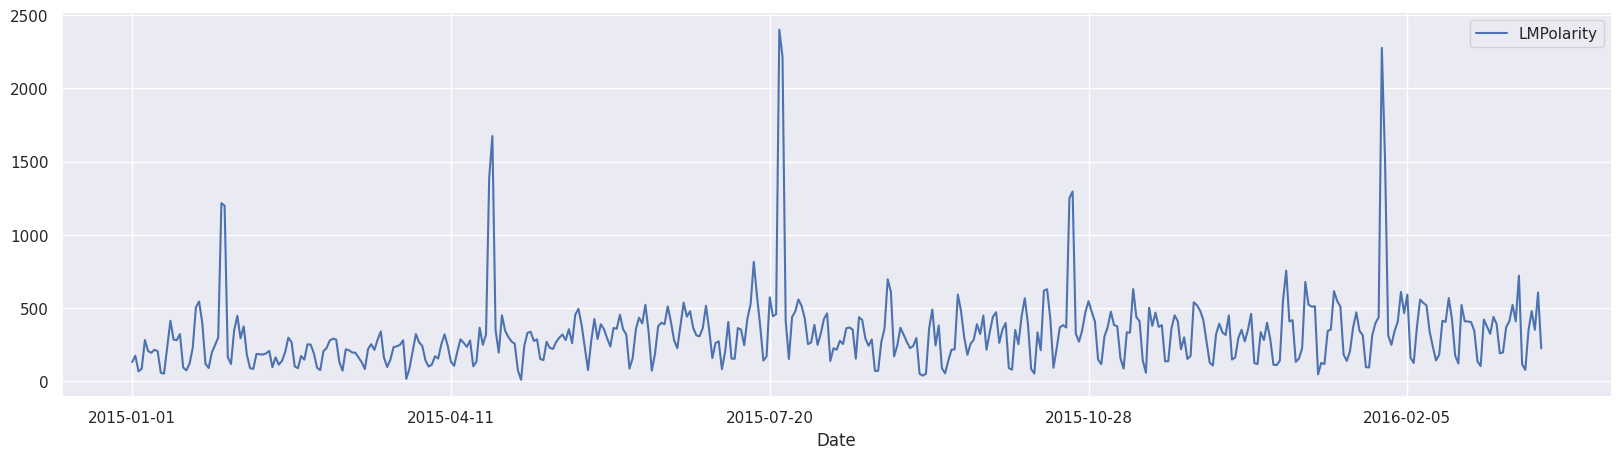

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the count
df_count = df.groupby(['Date']).count()
# Get the cross-section of compound in the 'columns' axis
df_count_col = pd.DataFrame(df_count.xs('LMPolarity', axis='columns'))
# Plot a bar chart with pandas

df_count_col.plot( figsize=(20,5))

In [24]:

#df_count_col['Date']=df_count_col.index
df_count_col=df_count_col.reset_index()

df_count_col = df_count_col.sort_values(by="Date")

In [25]:
df_count_col

,Date,LMPolarity
0,2015-01-01,131
1,2015-01-02,174
2,2015-01-03,67
3,2015-01-04,85
4,2015-01-05,281
...,...,...
438,2016-03-14,347
439,2016-03-15,479
440,2016-03-16,351
441,2016-03-17,606


In [26]:
from pandas.io.parsers.readers import read_csv
print(df)

        Unnamed: 0      tweet_id ticker_symbol           writer   post_date  \
0                3  5.504417e+17          AMZN      DozenStocks  1420070510   
96             422  5.506978e+17          AMZN  RobertWeinstein  1420131567   
95             419  5.506958e+17          AMZN      DozenStocks  1420131089   
94             408  5.506905e+17          AMZN     IBDinvestors  1420129818   
93             386  5.506831e+17          AMZN          CapCube  1420128065   
...            ...           ...           ...              ...         ...   
143627     1024772  7.108062e+17          AMZN  LloydCreekStock  1458304367   
143628     1024773  7.108062e+17          AMZN  LloydCreekStock  1458304367   
143629     1024777  7.108068e+17          AMZN    Albert_Report  1458304513   
143659     1024940  7.108201e+17          AMZN       EQMIndexes  1458307683   
143772     1025685  7.108697e+17          AMZN              bux  1458319516   

                                                   

In [27]:
#Downloading the dataset
import yfinance as yf
MyTicker = yf.Ticker("AMZN")
data_s = MyTicker.history(period="max")
data_s['Date'] = data_s.index
data = data_s[['Date','Close','Open', 'High', 'Low','Volume']]
data = data.drop('Date', axis = 1)
#Cutting the dataset rows
data = data[data.index > "2015-01-01"]
data = data[data.index < "2019-12-31"]
#Cutting the dataset columns
data = data[['Close', 'Volume']]
data

,Close,Volume
Date,,
2015-01-02 00:00:00-05:00,15.426000,55664000
2015-01-05 00:00:00-05:00,15.109500,55484000
2015-01-06 00:00:00-05:00,14.764500,70380000
2015-01-07 00:00:00-05:00,14.921000,52806000
2015-01-08 00:00:00-05:00,15.023000,61768000
...,...,...
2019-12-23 00:00:00-05:00,89.650002,42728000
2019-12-24 00:00:00-05:00,89.460503,17626000
2019-12-26 00:00:00-05:00,93.438499,120108000


In [28]:
import plotly.graph_objs as go

# create the time series plot for the closing price
close_trace = go.Scatter(name='Close', x=data.index, y=data['Close'])

# create the time series plot for the volume
volume_trace = go.Scatter(name='Volume', x=data.index, y=data['Volume'], yaxis='y2')

# create the figure and layout
fig = go.Figure(data=[close_trace, volume_trace])
fig.update_layout(
    title="Closing stock's price and volume of Boeing 1966-2021",
    xaxis_title="Date"
)

# add a secondary Y-axis for the volume data
fig.update_layout(yaxis2=dict(title='Volume', overlaying='y', side='right'))

# show the figure
fig.show()


## Question

Use Loughran and McDonald Financial Sentiment Dictionaries for  the follwing questions

Plot time series of the daily average of the number of tweets


Plot time series of the daily average of sentiment score of tweets

Plot time series of the daily average of positive score of tweets

Plot time series of the daily average of negative score of tweets

Plot time series of the daily average of subjectivity score of tweets

Explain each plot briefly



<Axes: xlabel='Date'>

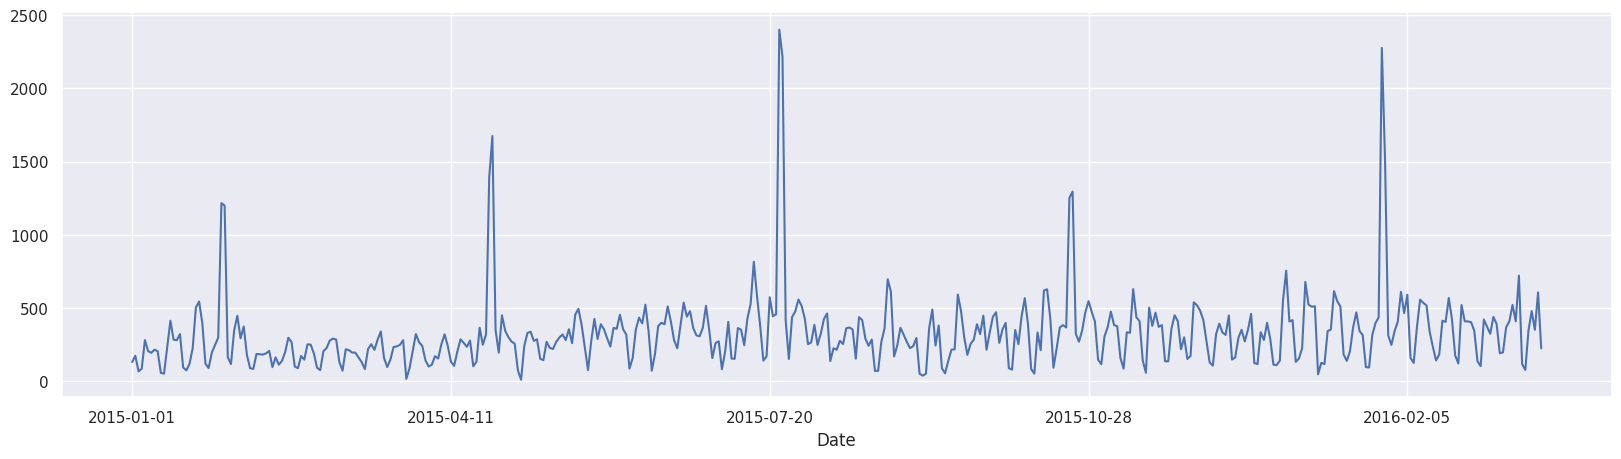

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

count_c = df.groupby(['Date']).count()


# Get the cross-section of compound in the 'columns' axis
count_col = count_c.xs('LMPolarity', axis='columns')

count_col.plot( figsize=(20,5))

In [30]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


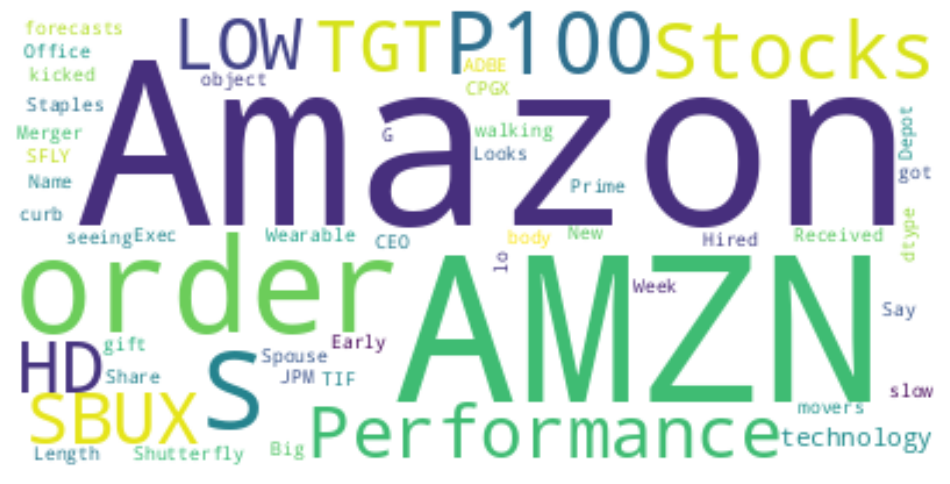

In [31]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white",stopwords=STOPWORDS).generate(str(df['body']))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

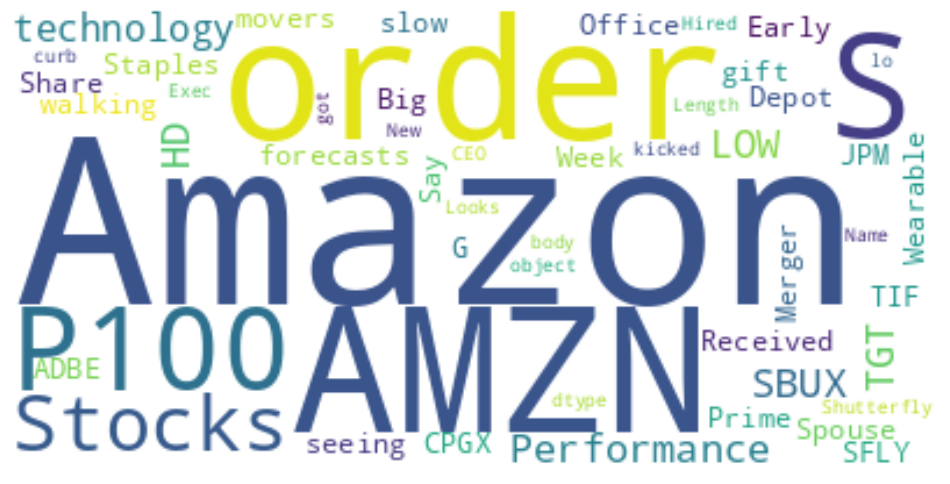

In [32]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["year", "now"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(df['body']))

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

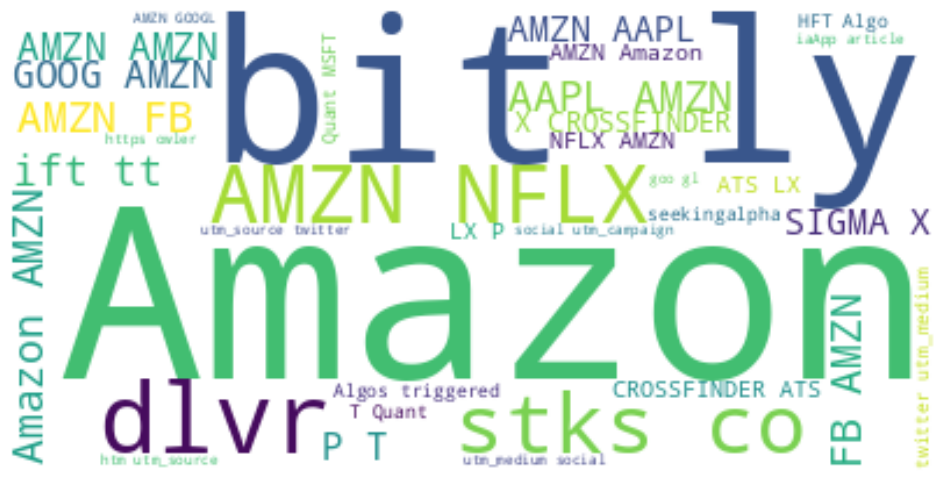

In [33]:
#STOPWORDS:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# assuming df is your DataFrame and 'body' is the column containing the text data
text = " ".join(review for review in df['body'])

# remove stopwords from the text
stopwords = set(STOPWORDS)
text = " ".join(word for word in text.split() if word.lower() not in stopwords)

# generate the WordCloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# plot the WordCloud image
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


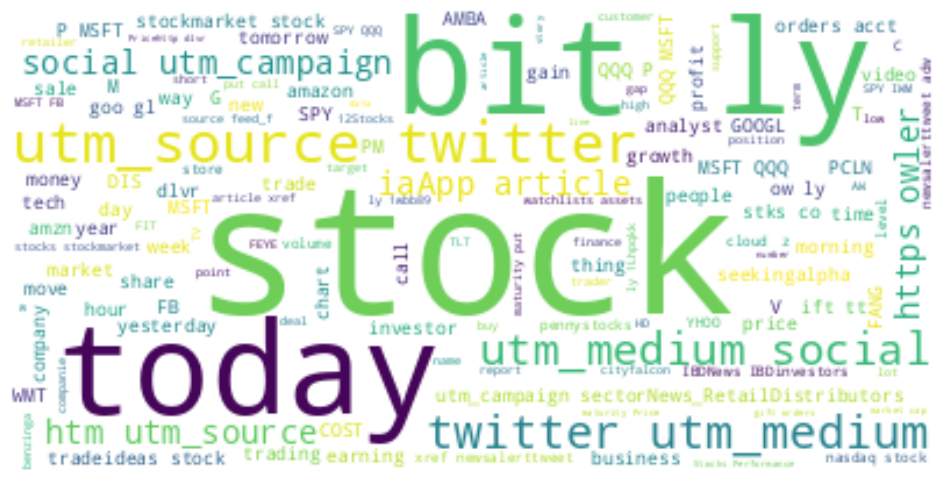

In [34]:
#NOUNS:
import pandas as pd
from wordcloud import WordCloud
import spacy
import matplotlib.pyplot as plt

# assuming df is your DataFrame and 'body' is the column containing the text data
text = " ".join(review for review in df['body'])

# load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# define the chunk size
chunk_size = 100000

# process the text in chunks and extract the NOUNs
nouns = []
for i in range(0, len(text), chunk_size):
    chunk = text[i:i+chunk_size]
    doc = nlp(chunk)
    nouns += [token.text for token in doc if token.pos_ == 'NOUN']

# convert the list of NOUNs into a string
nouns_text = " ".join(nouns)

# generate the WordCloud image
wordcloud = WordCloud(background_color="white").generate(nouns_text)

# plot the WordCloud image
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




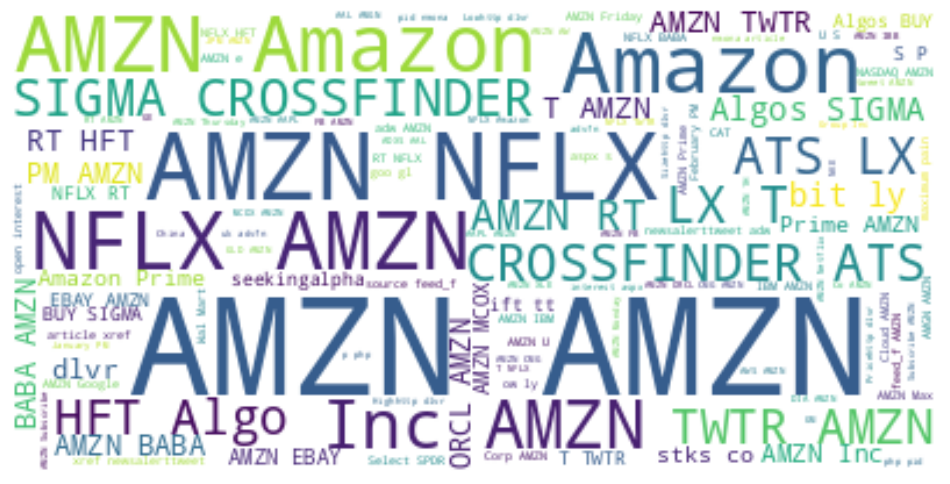

In [35]:
#PROPPER NOUNS
import pandas as pd
from wordcloud import WordCloud
import spacy
import matplotlib.pyplot as plt

# load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# assuming df is your DataFrame and 'body' is the column containing the text data
text = " ".join(review for review in df['body'])

# process the text in smaller chunks using spaCy and extract the PROPNs
propns = []
for doc in nlp.pipe(text.split(), batch_size=1000, n_process=4):
    propns += [token.text for token in doc if token.pos_ == 'PROPN']

# convert the list of PROPNs into a string
propns_text = " ".join(propns)

# generate the WordCloud image
wordcloud = WordCloud(background_color="white").generate(propns_text)

# plot the WordCloud image
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




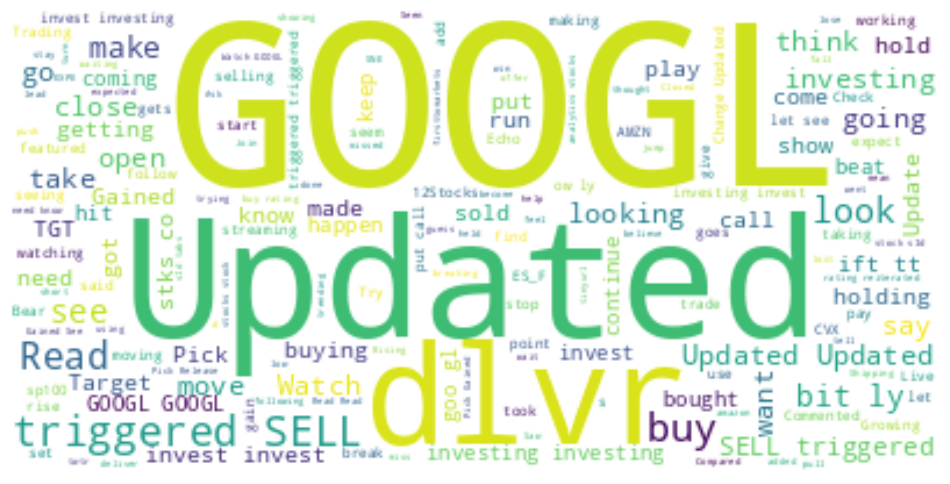

In [36]:
# VERBS
import pandas as pd
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# assuming df is your DataFrame and 'body' is the column containing the text data
text = " ".join(review for review in df['body'])

# process the text in smaller chunks using spaCy and extract the verbs
verbs = []
for doc in nlp.pipe(text.split(), batch_size=1000, n_process=4):
    verbs += [token.text for token in doc if token.pos_ == 'VERB']

# convert the list of verbs into a string
verbs_text = " ".join(verbs)

# generate the WordCloud image
wordcloud = WordCloud(background_color="white").generate(verbs_text)

# plot the WordCloud image
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



##  Download history data from yahoo finance

In [37]:
mean_c

,Unnamed: 0,tweet_id,post_date,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity
Date,,,,,,,,,,,,,,
2015-01-01,2.674275e+02,5.505900e+17,1.420106e+09,0.343511,5.335878,1.465649,0.702290,1.160305,-0.232061,0.144693,0.106870,0.793893,-0.323155,0.072189
2015-01-02,1.361862e+03,5.510230e+17,1.420209e+09,0.063218,2.166667,0.528736,0.885057,0.729885,0.078051,0.140676,0.166667,0.350575,-0.071839,0.042182
2015-01-03,2.739000e+03,5.513602e+17,1.420289e+09,0.029851,0.134328,0.716418,0.820896,0.985075,-0.116915,0.151932,0.104478,0.119403,-0.014925,0.021238
2015-01-04,3.666553e+03,5.517317e+17,1.420378e+09,0.035294,0.235294,0.588235,0.717647,0.788235,-0.168235,0.126043,0.047059,0.105882,-0.047059,0.011465
2015-01-05,5.170520e+03,5.520939e+17,1.420464e+09,0.049822,0.188612,0.451957,0.494662,0.661922,-0.181257,0.098158,0.145907,0.249110,-0.062871,0.031577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-14,1.013141e+06,7.094136e+17,1.457972e+09,0.066282,0.368876,0.414986,0.487032,0.311239,0.072732,0.064603,0.097983,0.095101,0.005764,0.017126
2016-03-15,1.016122e+06,7.097617e+17,1.458055e+09,0.031315,0.185804,0.331942,0.826722,0.565762,0.197634,0.105510,0.104384,0.189979,-0.048713,0.024089
2016-03-16,1.019268e+06,7.101273e+17,1.458143e+09,0.074074,0.253561,0.381766,0.786325,0.626781,0.108859,0.102909,0.122507,0.250712,-0.042735,0.030026


Please select the symbol of stock from this list

* Group.   Symbol | Company 
2.   AMZN | Amazon.com


In [38]:
# The first the step is to download history data from yahoo finance.
# Install yahoo finance package 

In [39]:
import os
os.environ['LC_ALL'] = 'en_US.UTF-8'
os.environ['LANG'] = 'en_US.UTF-8'


In [40]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"


In [41]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np 
import pandas as pd
import plotly.graph_objs as go

import statsmodels as sm
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler

import re
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor 
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras.models import Sequential
from keras.layers import LSTM

In [43]:
MyTicker = yf.Ticker("AMZN")

In [44]:
print(MyTicker.info)
## More options: https://github.com/ranaroussi/yfinance

{'symbol': 'AMZN', 'twoHundredDayAverageChangePercent': -0.05920539, 'averageAnalystRating': '1.8 - Buy', 'fiftyTwoWeekLowChangePercent': 0.24155714, 'language': 'en-US', 'preMarketChangePercent': -0.37586278, 'regularMarketDayRange': '100.7506 - 103.91', 'earningsTimestampEnd': 1682942400, 'epsForward': 2.51, 'regularMarketDayHigh': 103.91, 'twoHundredDayAverageChange': -6.3623505, 'twoHundredDayAverage': 107.46235, 'askSize': 12, 'bookValue': 14.259, 'fiftyTwoWeekHighChange': -58.978996, 'marketCap': 1051581480960, 'fiftyTwoWeekRange': '81.43 - 160.079', 'fiftyDayAverageChange': 2.791397, 'firstTradeDateMilliseconds': 863703000000, 'averageDailyVolume3Month': 66801631, 'exchangeDataDelayedBy': 0, 'trailingAnnualDividendRate': 0.0, 'fiftyTwoWeekLow': 81.43, 'market': 'us_market', 'regularMarketVolume': 43681697, 'quoteSourceName': 'Nasdaq Real Time Price', 'messageBoardId': 'finmb_18749', 'priceHint': 2, 'sourceInterval': 15, 'exchange': 'NMS', 'regularMarketDayLow': 100.7506, 'shortN

In [45]:
# get historical market data from yahoo finance
data_s = MyTicker.history(period="max")
#data_s['Date'] = data_s.index
data_s=data_s.reset_index()

In [46]:
data_s

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...,...
6511,2023-03-30 00:00:00-04:00,101.550003,103.040001,101.010002,102.000000,53633400,0.0,0.0
6512,2023-03-31 00:00:00-04:00,102.160004,103.489998,101.949997,103.290001,56704300,0.0,0.0
6513,2023-04-03 00:00:00-04:00,102.300003,103.290001,101.430000,102.410004,41135700,0.0,0.0
6514,2023-04-04 00:00:00-04:00,102.750000,104.199997,102.110001,103.949997,48662500,0.0,0.0


In [47]:
# Question 2: check data and provide statistical description of stock price, Explain?
import pandas as pd
pd.set_option('display.max_columns', 500) # To be able to see all the columns of the describe method
print(data_s.describe())
data_s.head(5)

              Open         High          Low        Close        Volume  \
count  6516.000000  6516.000000  6516.000000  6516.000000  6.516000e+03   
mean     31.611626    31.991995    31.193432    31.599740  1.425338e+08   
std      48.095343    48.659651    47.464476    48.060258  1.401619e+08   
min       0.070313     0.072396     0.065625     0.069792  9.744000e+06   
25%       1.998875     2.028500     1.964750     2.001250  6.888182e+07   
50%       6.456750     6.535500     6.353250     6.444250  1.059050e+08   
75%      38.451375    38.688000    38.203001    38.464625  1.607700e+08   
max     187.199997   188.654007   184.839493   186.570496  2.086584e+09   

       Dividends  Stock Splits  
count     6516.0   6516.000000  
mean         0.0      0.004144  
std          0.0      0.252960  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0     20.000000  


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0


## Analysis of time series of Stock Price

In [48]:
# Extracting Date, Open, High, Low and Close from the Dataframe.
data = data_s[['Date','Close','Open', 'High', 'Low','Volume']]

In [49]:
# Plot time series the close price and volume of stock price 
# Question 3: Explain the time series plots and try to identify important events
  
fig=go.Figure(data=[go.Scatter(name = 'Close',x= data['Date'],y= data['Close'])])
fig.update_layout(title="Closing stock's price of Boeing 1966-2021",xaxis_title="Date", yaxis_title="Price (in $)")
fig.show()

fig=go.Figure(data=[go.Scatter(name = 'Volume',x= data['Date'],y= data['Volume'])])
fig.update_layout(title="Volume of Boeing's stock 1966-2021",xaxis_title="Date", yaxis_title="Volume")
fig.show()


In [50]:
# Extracting Date and Close from the Dataframe.
data_extr = data_s[['Date','Close', 'Volume']]
df_extr = df[['comment_num'	,'retweet_num',	'like_num',	'Date',	'hiv4Positive',	'hiv4Negative',	'hiv4Polarity',	'hiv4Subjectivity',	'LMPositive',	'LMNegative',	'LMPolarity',	'LMSubjectivity']]

In [51]:
mean_c

,Unnamed: 0,tweet_id,post_date,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity
Date,,,,,,,,,,,,,,
2015-01-01,2.674275e+02,5.505900e+17,1.420106e+09,0.343511,5.335878,1.465649,0.702290,1.160305,-0.232061,0.144693,0.106870,0.793893,-0.323155,0.072189
2015-01-02,1.361862e+03,5.510230e+17,1.420209e+09,0.063218,2.166667,0.528736,0.885057,0.729885,0.078051,0.140676,0.166667,0.350575,-0.071839,0.042182
2015-01-03,2.739000e+03,5.513602e+17,1.420289e+09,0.029851,0.134328,0.716418,0.820896,0.985075,-0.116915,0.151932,0.104478,0.119403,-0.014925,0.021238
2015-01-04,3.666553e+03,5.517317e+17,1.420378e+09,0.035294,0.235294,0.588235,0.717647,0.788235,-0.168235,0.126043,0.047059,0.105882,-0.047059,0.011465
2015-01-05,5.170520e+03,5.520939e+17,1.420464e+09,0.049822,0.188612,0.451957,0.494662,0.661922,-0.181257,0.098158,0.145907,0.249110,-0.062871,0.031577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-14,1.013141e+06,7.094136e+17,1.457972e+09,0.066282,0.368876,0.414986,0.487032,0.311239,0.072732,0.064603,0.097983,0.095101,0.005764,0.017126
2016-03-15,1.016122e+06,7.097617e+17,1.458055e+09,0.031315,0.185804,0.331942,0.826722,0.565762,0.197634,0.105510,0.104384,0.189979,-0.048713,0.024089
2016-03-16,1.019268e+06,7.101273e+17,1.458143e+09,0.074074,0.253561,0.381766,0.786325,0.626781,0.108859,0.102909,0.122507,0.250712,-0.042735,0.030026


In [52]:
data_extr['Date']

0      1997-05-15 00:00:00-04:00
1      1997-05-16 00:00:00-04:00
2      1997-05-19 00:00:00-04:00
3      1997-05-20 00:00:00-04:00
4      1997-05-21 00:00:00-04:00
                  ...           
6511   2023-03-30 00:00:00-04:00
6512   2023-03-31 00:00:00-04:00
6513   2023-04-03 00:00:00-04:00
6514   2023-04-04 00:00:00-04:00
6515   2023-04-05 00:00:00-04:00
Name: Date, Length: 6516, dtype: datetime64[ns, America/New_York]

In [53]:
# Convert the 'Date' column to datetime format
data_extr['Date'] = pd.to_datetime(data_extr['Date'])

# Format the 'Date' column to 'YYYY-MM-DD' format
data_extr['Date'] = data_extr['Date'].dt.strftime('%Y-%m-%d')

# Print the updated DataFrame
print(data_extr)

            Date       Close      Volume
0     1997-05-15    0.097917  1443120000
1     1997-05-16    0.086458   294000000
2     1997-05-19    0.085417   122136000
3     1997-05-20    0.081771   109344000
4     1997-05-21    0.071354   377064000
...          ...         ...         ...
6511  2023-03-30  102.000000    53633400
6512  2023-03-31  103.290001    56704300
6513  2023-04-03  102.410004    41135700
6514  2023-04-04  103.949997    48662500
6515  2023-04-05  101.099998    45103000

[6516 rows x 3 columns]


<ipython-input-53-d7151fea99e3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-d7151fea99e3>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
data_extr

,Date,Close,Volume
0,1997-05-15,0.097917,1443120000
1,1997-05-16,0.086458,294000000
2,1997-05-19,0.085417,122136000
3,1997-05-20,0.081771,109344000
4,1997-05-21,0.071354,377064000
...,...,...,...
6511,2023-03-30,102.000000,53633400
6512,2023-03-31,103.290001,56704300
6513,2023-04-03,102.410004,41135700
6514,2023-04-04,103.949997,48662500


In [55]:
Final=mean_c.join(data_extr.set_index('Date'), on = 'Date')
Final.dropna(inplace=True) 

In [56]:
Final.head()

,Unnamed: 0,tweet_id,post_date,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity,Close,Volume
Date,,,,,,,,,,,,,,,,
2015-01-02,1361.862069,5.510230e+17,1.420209e+09,0.063218,2.166667,0.528736,0.885057,0.729885,0.078051,0.140676,0.166667,0.350575,-0.071839,0.042182,15.4260,55664000.0
2015-01-05,5170.519573,5.520939e+17,1.420464e+09,0.049822,0.188612,0.451957,0.494662,0.661922,-0.181257,0.098158,0.145907,0.249110,-0.062871,0.031577,15.1095,55484000.0
2015-01-06,7705.626214,5.524735e+17,1.420555e+09,0.053398,0.325243,0.674757,0.922330,0.606796,0.046602,0.126150,0.126214,0.242718,-0.093851,0.032612,14.7645,70380000.0
2015-01-07,9973.814433,5.528195e+17,1.420637e+09,0.041237,0.195876,0.855670,0.737113,0.819588,-0.086426,0.136590,0.097938,0.314433,-0.151203,0.031234,14.9210,52806000.0
2015-01-08,12667.897674,5.532015e+17,1.420728e+09,0.120930,0.190698,0.502326,0.730233,0.851163,-0.146822,0.146299,0.116279,0.167442,-0.032558,0.027613,15.0230,61768000.0


In [57]:
# run this function to split dataset. Explain how this function split financial data set. Why we cannot split financial
# time seires to train and test randomly?   

def Split_Train_Test(data, test_ratio):
    '''splits data into a training and testing set'''
    train_set_size = 1 - int(len(data) * test_ratio)
    train_set = data[:train_set_size]
    test_set = data[train_set_size:]
    return train_set, test_set

In [58]:
dataset_foranalysis=Final.drop(['Unnamed: 0'], axis=1)
# use above function to split data to (30%-70%). 
train, test = Split_Train_Test(dataset_foranalysis, 0.3)

In [59]:
lags = range(1, 5)  # Just two lags for demonstration.

train_XX=train.loc[:, train.columns]
train_XXlag=train_XX.assign(**{
  f'{col} (t-{lag})': train_XX[col].shift(lag)
  for lag in lags
  for col in train_XX
  })
train_XXlag=train_XXlag.loc[:, train_XXlag.columns != 'Close']

Y_train = train["Close"]
Y_train.drop(Y_train.head(5).index,inplace=True) # drop last n rows
train_XXlag.drop(train_XXlag.head(5).index,inplace=True) # drop last n rows


test_XX=test.loc[:, test.columns]
test_XXlag=test_XX.assign(**{
  f'{col} (t-{lag})': test_XX[col].shift(lag)
  for lag in lags
  for col in test_XX
  })
test_XXlag=test_XXlag.loc[:, test_XXlag.columns != 'Close']

Y_test = test["Close"]
Y_test.drop(Y_test.head(5).index,inplace=True) # drop last n rows
test_XXlag.drop(test_XXlag.head(5).index,inplace=True) # drop last n rows


<ipython-input-59-162f0f4784a9>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-59-162f0f4784a9>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
train_XXlag

,tweet_id,post_date,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity,Volume,tweet_id (t-1),post_date (t-1),comment_num (t-1),retweet_num (t-1),like_num (t-1),hiv4Positive (t-1),hiv4Negative (t-1),hiv4Polarity (t-1),hiv4Subjectivity (t-1),LMPositive (t-1),LMNegative (t-1),LMPolarity (t-1),LMSubjectivity (t-1),Close (t-1),Volume (t-1),tweet_id (t-2),post_date (t-2),comment_num (t-2),retweet_num (t-2),like_num (t-2),hiv4Positive (t-2),hiv4Negative (t-2),hiv4Polarity (t-2),hiv4Subjectivity (t-2),LMPositive (t-2),LMNegative (t-2),LMPolarity (t-2),LMSubjectivity (t-2),Close (t-2),Volume (t-2),tweet_id (t-3),post_date (t-3),comment_num (t-3),retweet_num (t-3),like_num (t-3),hiv4Positive (t-3),hiv4Negative (t-3),hiv4Polarity (t-3),hiv4Subjectivity (t-3),LMPositive (t-3),LMNegative (t-3),LMPolarity (t-3),LMSubjectivity (t-3),Close (t-3),Volume (t-3),tweet_id (t-4),post_date (t-4),comment_num (t-4),retweet_num (t-4),like_num (t-4),hiv4Positive (t-4),hiv4Negative (t-4),hiv4Polarity (t-4),hiv4Subjectivity (t-4),LMPositive (t-4),LMNegative (t-4),LMPolarity (t-4),LMSubjectivity (t-4),Close (t-4),Volume (t-4)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-09,5.535806e+17,1.420819e+09,0.092683,0.082927,0.458537,0.717073,0.609756,0.091173,0.121449,0.092683,0.185366,-0.063415,0.026238,51848000.0,5.532015e+17,1.420728e+09,0.120930,0.190698,0.502326,0.730233,0.851163,-0.146822,0.146299,0.116279,0.167442,-0.032558,0.027613,15.023000,61768000.0,5.528195e+17,1.420637e+09,0.041237,0.195876,0.855670,0.737113,0.819588,-0.086426,0.136590,0.097938,0.314433,-0.151203,0.031234,14.921000,52806000.0,5.524735e+17,1.420555e+09,0.053398,0.325243,0.674757,0.922330,0.606796,0.046602,0.126150,0.126214,0.242718,-0.093851,0.032612,14.764500,70380000.0,5.520939e+17,1.420464e+09,0.049822,0.188612,0.451957,0.494662,0.661922,-0.181257,0.098158,0.145907,0.249110,-0.062871,0.031577,15.109500,55484000.0
2015-01-12,5.546217e+17,1.421067e+09,0.152174,0.321739,0.773913,0.756522,0.547826,0.050145,0.123017,0.300000,0.208696,0.044928,0.051108,68428000.0,5.535806e+17,1.420819e+09,0.092683,0.082927,0.458537,0.717073,0.609756,0.091173,0.121449,0.092683,0.185366,-0.063415,0.026238,14.846500,51848000.0,5.532015e+17,1.420728e+09,0.120930,0.190698,0.502326,0.730233,0.851163,-0.146822,0.146299,0.116279,0.167442,-0.032558,0.027613,15.023000,61768000.0,5.528195e+17,1.420637e+09,0.041237,0.195876,0.855670,0.737113,0.819588,-0.086426,0.136590,0.097938,0.314433,-0.151203,0.031234,14.921000,52806000.0,5.524735e+17,1.420555e+09,0.053398,0.325243,0.674757,0.922330,0.606796,0.046602,0.126150,0.126214,0.242718,-0.093851,0.032612,14.764500,70380000.0
2015-01-13,5.550130e+17,1.421160e+09,0.113801,0.421308,0.665860,1.009685,0.612591,0.177724,0.150654,0.193705,0.135593,0.050444,0.027895,82728000.0,5.546217e+17,1.421067e+09,0.152174,0.321739,0.773913,0.756522,0.547826,0.050145,0.123017,0.300000,0.208696,0.044928,0.051108,14.570500,68428000.0,5.535806e+17,1.420819e+09,0.092683,0.082927,0.458537,0.717073,0.609756,0.091173,0.121449,0.092683,0.185366,-0.063415,0.026238,14.846500,51848000.0,5.532015e+17,1.420728e+09,0.120930,0.190698,0.502326,0.730233,0.851163,-0.146822,0.146299,0.116279,0.167442,-0.032558,0.027613,15.023000,61768000.0,5.528195e+17,1.420637e+09,0.041237,0.195876,0.855670,0.737113,0.819588,-0.086426,0.136590,0.097938,0.314433,-0.151203,0.031234,14.921000,52806000.0
2015-01-14,5.553623e+17,1.421244e+09,0.123239,0.299296,0.411972,0.964789,0.725352,0.061653,0.154327,0.183099,0.133803,0.024648,0.029818,110774000.0,5.550130e+17,1.421160e+09,0.113801,0.421308,0.665860,1.009685,0.612591,0.177724,0.150654,0.193705,0.135593,0.050444,0.027895,14.737000,82728000.0,5.546217e+17,1.421067e+09,0.152174,0.321739,0.773913,0.756522,0.547826,0.050145,0.123017,0.300000,0.208696,0.044928,0.051108,14.570500,68428000.0,5.535806e+17,1.420819e+09,0.092683,0.082927,0.458537,0.717073,0.60975

In [61]:
Y_train

Date
2015-01-09    14.846500
2015-01-12    14.570500
2015-01-13    14.737000
2015-01-14    14.663500
2015-01-15    14.347500
                ...    
2015-11-02    31.417500
2015-11-03    31.265499
2015-11-04    32.047501
2015-11-05    32.782501
2015-11-06    32.968498
Name: Close, Length: 210, dtype: float64

In [62]:
test_XXlag

,tweet_id,post_date,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity,Volume,tweet_id (t-1),post_date (t-1),comment_num (t-1),retweet_num (t-1),like_num (t-1),hiv4Positive (t-1),hiv4Negative (t-1),hiv4Polarity (t-1),hiv4Subjectivity (t-1),LMPositive (t-1),LMNegative (t-1),LMPolarity (t-1),LMSubjectivity (t-1),Close (t-1),Volume (t-1),tweet_id (t-2),post_date (t-2),comment_num (t-2),retweet_num (t-2),like_num (t-2),hiv4Positive (t-2),hiv4Negative (t-2),hiv4Polarity (t-2),hiv4Subjectivity (t-2),LMPositive (t-2),LMNegative (t-2),LMPolarity (t-2),LMSubjectivity (t-2),Close (t-2),Volume (t-2),tweet_id (t-3),post_date (t-3),comment_num (t-3),retweet_num (t-3),like_num (t-3),hiv4Positive (t-3),hiv4Negative (t-3),hiv4Polarity (t-3),hiv4Subjectivity (t-3),LMPositive (t-3),LMNegative (t-3),LMPolarity (t-3),LMSubjectivity (t-3),Close (t-3),Volume (t-3),tweet_id (t-4),post_date (t-4),comment_num (t-4),retweet_num (t-4),like_num (t-4),hiv4Positive (t-4),hiv4Negative (t-4),hiv4Polarity (t-4),hiv4Subjectivity (t-4),LMPositive (t-4),LMNegative (t-4),LMPolarity (t-4),LMSubjectivity (t-4),Close (t-4),Volume (t-4)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-11-16,6.662828e+17,1.447689e+09,0.205179,0.474104,0.611554,0.661355,0.308765,0.197676,0.097937,0.121514,0.117530,0.011952,0.025596,148718000.0,6.651716e+17,1.447424e+09,0.217073,0.302439,0.460976,0.582927,0.392683,0.098577,0.095072,0.153659,0.139024,0.000813,0.028562,32.117500,125222000.0,6.648138e+17,1.447339e+09,0.125858,0.290618,0.517162,0.757437,0.389016,0.157884,0.103745,0.132723,0.096110,0.040046,0.023165,33.279999,85694000.0,6.644610e+17,1.447255e+09,0.135135,0.453100,0.626391,0.831479,0.486486,0.172519,0.124275,0.128776,0.165342,-0.021728,0.027260,33.662498,107746000.0,6.640702e+17,1.447162e+09,0.078550,0.290030,0.287009,0.791541,0.435045,0.216746,0.104906,0.169184,0.199396,-0.025176,0.032105,32.984001,69790000.0
2015-11-17,6.666062e+17,1.447766e+09,0.150794,0.293651,0.462963,0.714286,0.523810,0.094999,0.105781,0.132275,0.193122,-0.044974,0.028189,86404000.0,6.662828e+17,1.447689e+09,0.205179,0.474104,0.611554,0.661355,0.308765,0.197676,0.097937,0.121514,0.117530,0.011952,0.025596,32.390499,148718000.0,6.651716e+17,1.447424e+09,0.217073,0.302439,0.460976,0.582927,0.392683,0.098577,0.095072,0.153659,0.139024,0.000813,0.028562,32.117500,125222000.0,6.648138e+17,1.447339e+09,0.125858,0.290618,0.517162,0.757437,0.389016,0.157884,0.103745,0.132723,0.096110,0.040046,0.023165,33.279999,85694000.0,6.644610e+17,1.447255e+09,0.135135,0.453100,0.626391,0.831479,0.486486,0.172519,0.124275,0.128776,0.165342,-0.021728,0.027260,33.662498,107746000.0
2015-11-18,6.669923e+17,1.447858e+09,0.222222,0.497863,0.743590,0.811966,0.395299,0.222782,0.109082,0.149573,0.136752,0.004274,0.027178,89396000.0,6.666062e+17,1.447766e+09,0.150794,0.293651,0.462963,0.714286,0.523810,0.094999,0.105781,0.132275,0.193122,-0.044974,0.028189,32.165001,86404000.0,6.662828e+17,1.447689e+09,0.205179,0.474104,0.611554,0.661355,0.308765,0.197676,0.097937,0.121514,0.117530,0.011952,0.025596,32.390499,148718000.0,6.651716e+17,1.447424e+09,0.217073,0.302439,0.460976,0.582927,0.392683,0.098577,0.095072,0.153659,0.139024,0.000813,0.028562,32.117500,125222000.0,6.648138e+17,1.447339e+09,0.125858,0.290618,0.517162,0.757437,0.389016,0.157884,0.103745,0.132723,0.096110,0.040046,0.023165,33.279999,85694000.0
2015-11-19,6.673394e+17,1.447941e+09,0.086253,0.404313,0.512129,0.754717,0.401617,0.188230,0.090506,0.088949,0.121294,-0.032345,0.016046,94104000.0,6.669923e+17,1.447858e+09,0.222222,0.497863,0.743590,0.811966,0.395299,0.222782,0.109082,0.149573,0.136752,0.004274,0.027178,33.176998,89396000.0,6.666062e+17,1.447766e+09,0.150794,0.293651,0.462963,0.714286,0.523810,0.094999,0.105781,0.132275,0.193122,-0.044974,0.028189,32.165001,86404000.0,6.662828e+17,1.447689e+09,0.205179,0.474104,0.611554,0.661355,0.308765,0.1

In [63]:
Y_test

Date
2015-11-16    32.390499
2015-11-17    32.165001
2015-11-18    33.176998
2015-11-19    33.063499
2015-11-20    33.422501
                ...    
2016-03-14    28.668501
2016-03-15    28.851000
2016-03-16    28.713499
2016-03-17    27.972000
2016-03-18    27.604000
Name: Close, Length: 85, dtype: float64

In [64]:
print(type(train_XXlag))
print(train_XXlag.shape)

<class 'pandas.core.frame.DataFrame'>
(210, 74)


In [65]:
print(type(Y_train))
print(Y_train.shape)

<class 'pandas.core.series.Series'>
(210,)


In [66]:
print(type(test_XXlag))
print(test_XXlag.shape)

<class 'pandas.core.frame.DataFrame'>
(85, 74)


In [67]:
print(type(Y_test))
print(Y_test.shape)

<class 'pandas.core.series.Series'>
(85,)


In [68]:
train_XXlag.shape[1]

74

# 6 Deep learning model with LSTM

Dimensioning the Trainning x's dataset

In [69]:
import numpy as np

window_size = 10
n_features = train_XXlag.shape[1]

# Convert the DataFrame to a numpy array
train_array = train_XXlag.values

# Create empty arrays for the X and Y data
XX_train = []
YY_train = []

# Iterate over the array, creating windows of size `window_size`
for i in range(window_size, len(train_array)):
    # Add the current window to the X data
    XX_train.append(train_array[i-window_size:i, :])
    # Add the corresponding target value to the Y data
    YY_train.append(Y_train[i])

# Convert the X and Y data to numpy arrays
XX_train = np.array(XX_train)
YY_train = np.array(YY_train)

# Reshape the X data to be 3D with shape (samples, time steps, features)
XX_train = np.reshape(XX_train, (XX_train.shape[0], window_size, n_features))


In [70]:
XX_train.shape

(200, 10, 74)

In [71]:
YY_train.shape

(200,)

In [72]:
import numpy as np

window_size = 10
n_features = test_XXlag.shape[1]

# Convert the DataFrame to a numpy array
test_array = test_XXlag.values

# Create empty arrays for the X and Y data
XX_test = []
YY_test = []

# Iterate over the array, creating windows of size `window_size`
for i in range(window_size, len(test_array)):
    # Add the current window to the X data
    XX_test.append(test_array[i-window_size:i, :])
    # Add the corresponding target value to the Y data
    YY_test.append(Y_test[i])

# Convert the X and Y data to numpy arrays
XX_test = np.array(XX_test)
YY_test = np.array(YY_test)

# Reshape the X data to be 3D with shape (samples, time steps, features)
XX_test = np.reshape(XX_test, (XX_test.shape[0], window_size, n_features))


In [73]:
XX_test.shape

(75, 10, 74)

In [74]:
YY_test.shape

(75,)

Now is time to create the deep learning model

In [75]:
# Import necessary modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
import numpy as np
import pandas as pd
from scipy.stats import randint as sp_randint

from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)


# Define a function to create the model
def create_model(dense_layer_sizes=(10,), optimizer='adam', dropout=0.1, activation_function='relu'):
    model = Sequential()
    model.add(LSTM(64, activation=activation_function, input_shape=(XX_train.shape[1], XX_train.shape[2]), return_sequences=True))
    model.add(LSTM(64, activation=activation_function, return_sequences=False))
    model.add(Dropout(dropout))

    for i in range(len(dense_layer_sizes)):
        model.add(Dense(dense_layer_sizes[i], activation=activation_function))
        model.add(Dropout(dropout))

    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model



# Define the random search parameters
param_dist = {'batch_size': sp_randint(32, 128),
              'epochs': sp_randint(50, 150),
              'optimizer': ['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam'],
              'dropout': [0.0, 0.1, 0.2],
              'dense_layer_sizes': [(10,), (20,), (30,), (10, 10), (20, 10), (30, 20)],
              'activation_function': ['relu', 'sigmoid', 'tanh']}

# Set up time series cross-validation
n_splits = 2
tscv = TimeSeriesSplit(n_splits=n_splits)

# Set up the KerasRegressor with early stopping
model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, verbose=0)
callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')]

# Set up the random search
seed = 1
n_iter_search = 20
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=tscv, n_iter=n_iter_search, random_state=seed, verbose=2, n_jobs=-1)

# Fit the random search to the training data
random_search_result = random_search.fit(XX_train, YY_train)

# Log the results
print('Best score: {}'.format(random_search_result.best_score_))
print('Best params: {}'.format(random_search_result.best_params_))

Fitting 2 folds for each of 20 candidates, totalling 40 fits


<ipython-input-75-17b8b2cd0b2f>:46: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning:

One or more of the test scores are non-finite: [-3.93084366e+02 -1.40591125e+34 -1.70624985e+02             nan
 -5.96248184e+02 -5.08133148e+02             nan -5.12221573e+02
 -4.84847900e+02 -6.35219971e+02 -8.85534033e+32 -3.74786804e+02
 -5.37428284e+02 -1.38599060e+02             nan -3.32839933e+34
             nan             nan -5.56496185e+02 -3.10317993e+02]



Best score: -138.59906005859375
Best params: {'activation_function': 'tanh', 'batch_size': 42, 'dense_layer_sizes': (20,), 'dropout': 0.0, 'epochs': 124, 'optimizer': 'RMSprop'}


In [ ]:
# Best random search:

In [81]:
# The best model according to the grid search
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

# Define parameters (CHANGE)
activation_function = 'tanh'
batch_size = 42
dense_layer_sizes = (20,)
dropout = 0.0
epochs = 124
optimizer = 'RMSprop'

# Define model architecture
model = Sequential()
model.add(LSTM(64, activation=activation_function, input_shape=(XX_train.shape[1], XX_train.shape[2]), return_sequences=True))
model.add(LSTM(64, activation=activation_function, return_sequences=False))
model.add(Dropout(dropout))

for i in range(len(dense_layer_sizes)):
    model.add(Dense(dense_layer_sizes[i], activation=activation_function))
    model.add(Dropout(dropout))

model.add(Dense(1))
    
# Compile model
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

# Print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 64)            35584     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 20)                1300      
                                                                 
 dropout_6 (Dropout)         (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 69,929
Trainable params: 69,929
Non-trai

In [82]:
# train model on full train set, with 80/20 CV split
BestModelFit = model.fit(XX_train, YY_train, epochs=124, batch_size=42, validation_split=0.2, verbose=1)

Epoch 1/124
4/4 [==============================] - 4s 256ms/step - loss: 433.6524 - mae: 20.5986 - mse: 433.6524 - val_loss: 661.3291 - val_mae: 25.6245 - val_mse: 661.3291
Epoch 2/124
4/4 [==============================] - 0s 15ms/step - loss: 345.9666 - mae: 18.3717 - mse: 345.9666 - val_loss: 589.7471 - val_mae: 24.1874 - val_mse: 589.7471
Epoch 3/124
4/4 [==============================] - 0s 16ms/step - loss: 307.5889 - mae: 17.2940 - mse: 307.5889 - val_loss: 560.4674 - val_mae: 23.5744 - val_mse: 560.4674
Epoch 4/124
4/4 [==============================] - 0s 16ms/step - loss: 290.5875 - mae: 16.7978 - mse: 290.5875 - val_loss: 544.3138 - val_mae: 23.2293 - val_mse: 544.3138
Epoch 5/124
4/4 [==============================] - 0s 15ms/step - loss: 280.6995 - mae: 16.5002 - mse: 280.6995 - val_loss: 533.8091 - val_mae: 23.0020 - val_mse: 533.8091
Epoch 6/124
4/4 [==============================] - 0s 15ms/step - loss: 274.0436 - mae: 16.2970 - mse: 274.0436 - val_loss: 526.1292 - val_


Mean_loss: 14927.66%

Mean_val_loss: 33866.37%


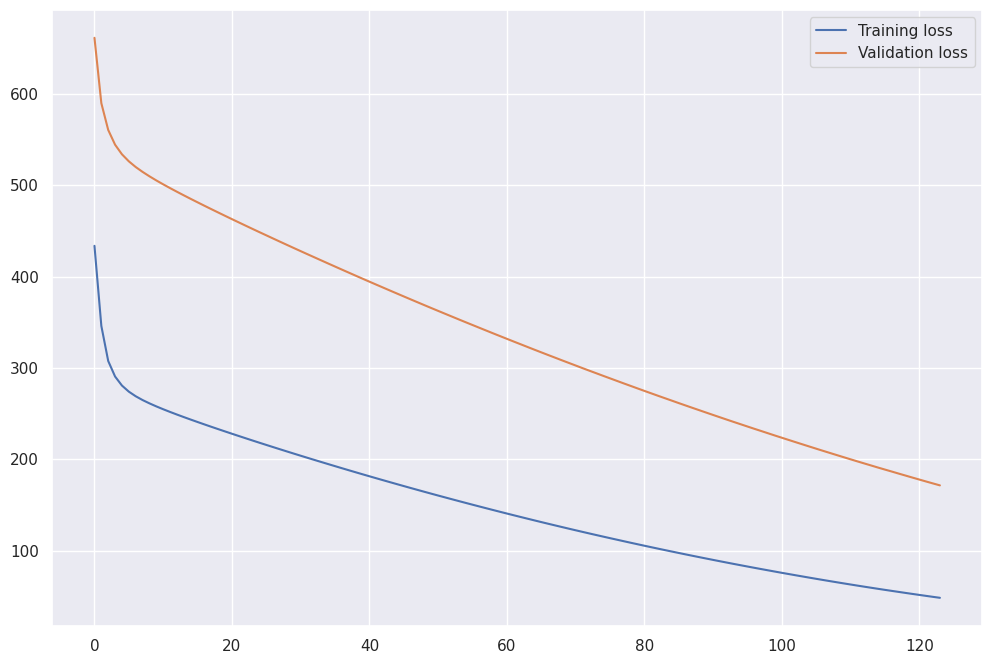

In [84]:
Mean_loss = np.mean(BestModelFit.history['loss'])
print("\n%s: %.2f%%" % ('Mean_loss', Mean_loss*100))
Mean_val_loss= np.mean(BestModelFit.history['val_loss'])
print("\n%s: %.2f%%" % ('Mean_val_loss', Mean_val_loss*100))
plt.figure(figsize=(12,8))
plt.plot(BestModelFit.history['loss'], label='Training loss')
plt.plot(BestModelFit.history['val_loss'], label='Validation loss')
plt.legend();

In [85]:
prediction_testY = model.predict(XX_test)
prediction_testY

3/3 [==============================] - 1s 4ms/step


array([[15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],
       [15.238218],


In [90]:
# Comparing predictions with actual values
YY_test.shape

(75,)

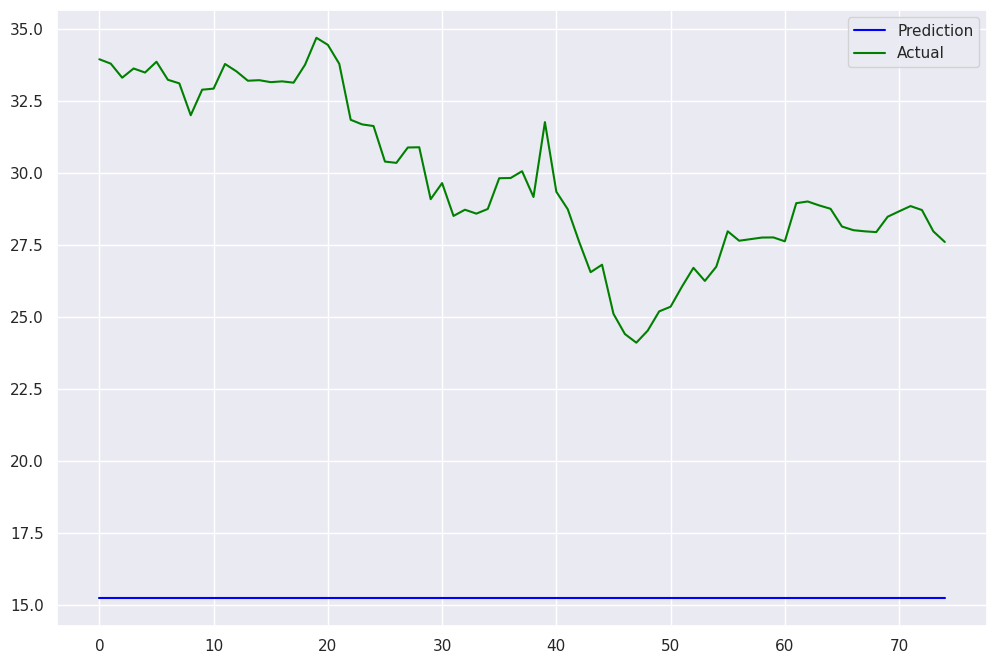

In [93]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12,8))
plt.plot(prediction_testY, color='blue', label='Prediction')
plt.plot(YY_test, color='green', label='Actual')
#plt.plot(testing_set, color='red', label='Other TestY')
plt.legend()
plt.show()

Deep learning model only with the close prices